In [2]:
install.packages('sf')

Installing package into 'C:/Users/ashok/Documents/R/win-library/4.1'
(as 'lib' is unspecified)

also installing the dependencies 'proxy', 'e1071', 'wk', 'classInt', 's2', 'units'




package 'proxy' successfully unpacked and MD5 sums checked
package 'e1071' successfully unpacked and MD5 sums checked
package 'wk' successfully unpacked and MD5 sums checked
package 'classInt' successfully unpacked and MD5 sums checked
package 's2' successfully unpacked and MD5 sums checked
package 'units' successfully unpacked and MD5 sums checked
package 'sf' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ashok\AppData\Local\Temp\RtmpormsGW\downloaded_packages


In [3]:
library("tidyverse")
library("sf")

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.6     v dplyr   1.0.7
v tidyr   1.2.0     v stringr 1.4.0
v readr   2.1.2     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Linking to GEOS 3.9.1, GDAL 3.2.1, PROJ 7.2.1; sf_use_s2() is TRUE



In [20]:
us_regions <- read_sf("cb_2018_us_region_500k/cb_2018_us_region_500k.shp")
us_regions

ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called 'geojsonio'

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_geojson.sf(obj)

REGIONCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<MULTIPOLYGON [°]>
1,0200000US1,1,Northeast,68,4.193578e+11,50259300137,MULTIPOLYGON (((-68.27472 4...
2,0200000US2,2,Midwest,68,1.943997e+12,184273267512,MULTIPOLYGON (((-82.73571 4...
4,0200000US4,4,West,68,4.536202e+12,316587292459,MULTIPOLYGON (((179.4825 51...
3,0200000US3,3,South,68,2.249872e+12,134084610547,MULTIPOLYGON (((-75.56555 3...


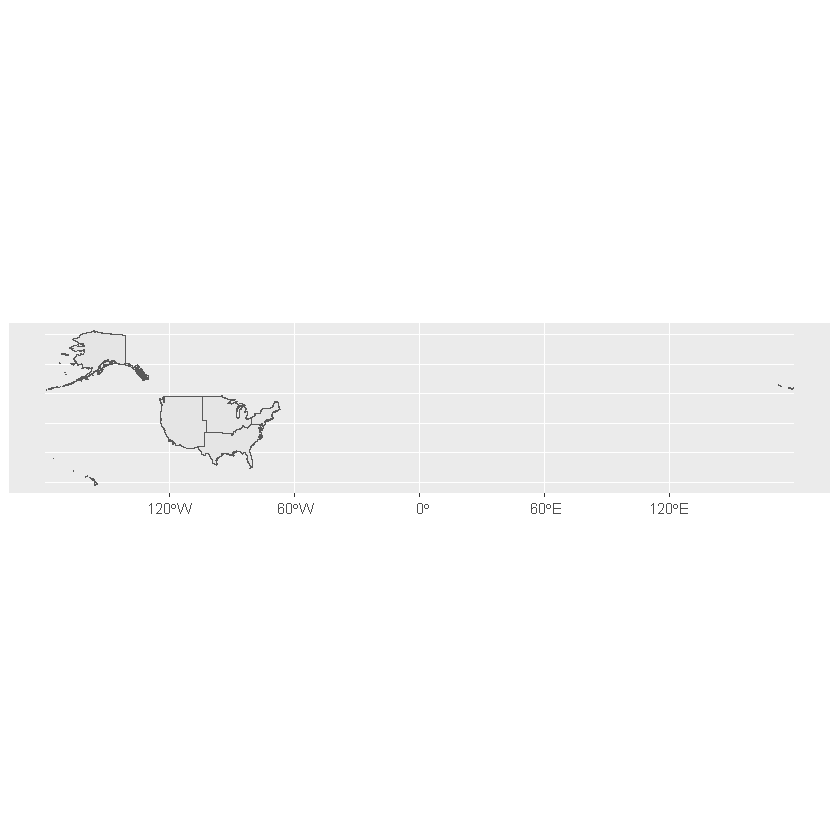

In [6]:
ggplot(us_regions) +
  geom_sf()

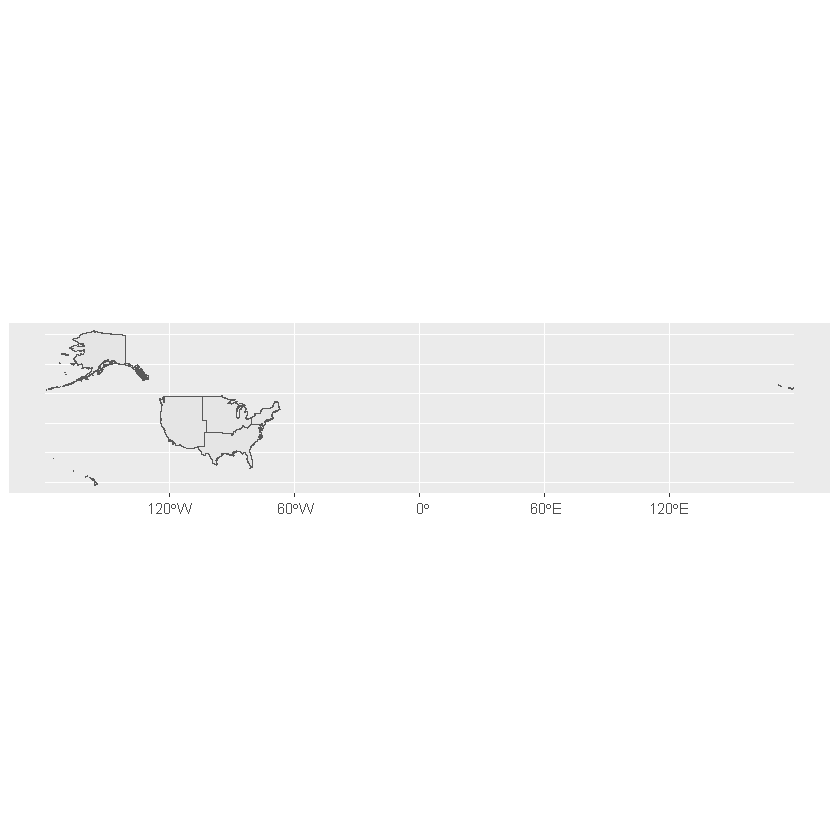

In [7]:
ggplot(us_regions) +
  geom_sf() +
  coord_sf()

In [9]:
us_regions_5m <- read_sf("cb_2018_us_region_5m/cb_2018_us_region_5m.shp")

ERROR: Error: Cannot open "cb_2018_us_region_5m/cb_2018_us_region_5m.shp"; The file doesn't seem to exist.


Prepare Data to be used with Shape file

In [10]:
insurance_data <- read_csv("insurance.csv")
head(insurance_data)

Rows: 1338 Columns: 7

-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (3): sex, smoker, region
dbl (4): age, bmi, children, expenses


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



age,sex,bmi,children,smoker,region,expenses
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
19,female,27.9,0,yes,southwest,16884.92
18,male,33.8,1,no,southeast,1725.55
28,male,33.0,3,no,southeast,4449.46
33,male,22.7,0,no,northwest,21984.47
32,male,28.9,0,no,northwest,3866.86
31,female,25.7,0,no,southeast,3756.62


In [11]:
insurance_data$region <- as.factor(insurance_data$region)
insurance_data$sex <- as.factor(insurance_data$sex)
insurance_data$smoker <- as.factor(insurance_data$smoker)
levels(insurance_data$region)
levels(insurance_data$sex)
levels(insurance_data$smoker)

[1] "northeast" "northwest" "southeast" "southwest"

[1] "female" "male"

[1] "no"  "yes"

In [14]:
insurance_data_regions <- insurance_data %>%
                            group_by(region)  %>%
                               summarize(regionsum = sum(expenses))
insurance_data_regions

region,regionsum
<fct>,<dbl>
northeast,4343669
northwest,4035712
southeast,5363690
southwest,4012755


Merge Data with our Shape File Data

In [25]:
names(insurance_data_regions)
names(us_regions)

head(insurance_data_regions)
head(us_regions)


[1] "region"    "regionsum" "REGIONCE"

[1] "REGIONCE" "AFFGEOID" "GEOID"    "NAME"     "LSAD"     "ALAND"    "AWATER"  
[8] "geometry"

region,regionsum,REGIONCE
<fct>,<dbl>,<dbl>
northeast,4343669,1
northwest,4035712,2
southeast,5363690,3
southwest,4012755,4


ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called 'geojsonio'

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_geojson.sf(obj)

REGIONCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<MULTIPOLYGON [°]>
1,0200000US1,1,Northeast,68,4.193578e+11,50259300137,MULTIPOLYGON (((-68.27472 4...
2,0200000US2,2,Midwest,68,1.943997e+12,184273267512,MULTIPOLYGON (((-82.73571 4...
4,0200000US4,4,West,68,4.536202e+12,316587292459,MULTIPOLYGON (((179.4825 51...
3,0200000US3,3,South,68,2.249872e+12,134084610547,MULTIPOLYGON (((-75.56555 3...


In [17]:
insurance_data_regions$REGIONCE <- c(1,2,3,4)b
merged_data <- merge(us_regions, insurance_data_regions, by.x="REGIONCE", by.y="REGIONCE")
merged_data

region,regionsum,REGIONCE
<fct>,<dbl>,<dbl>
northeast,4343669,1
northwest,4035712,2
southeast,5363690,3
southwest,4012755,4


ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called 'geojsonio'

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_geojson.sf(obj)

REGIONCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,region,regionsum,geometry
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<fct>,<dbl>,<MULTIPOLYGON [°]>
1,0200000US1,1,Northeast,68,4.193578e+11,50259300137,northeast,4343669,MULTIPOLYGON (((-68.27472 4...
2,0200000US2,2,Midwest,68,1.943997e+12,184273267512,northwest,4035712,MULTIPOLYGON (((-82.73571 4...
3,0200000US3,3,South,68,2.249872e+12,134084610547,southeast,5363690,MULTIPOLYGON (((-75.56555 3...
4,0200000US4,4,West,68,4.536202e+12,316587292459,southwest,4012755,MULTIPOLYGON (((179.4825 51...


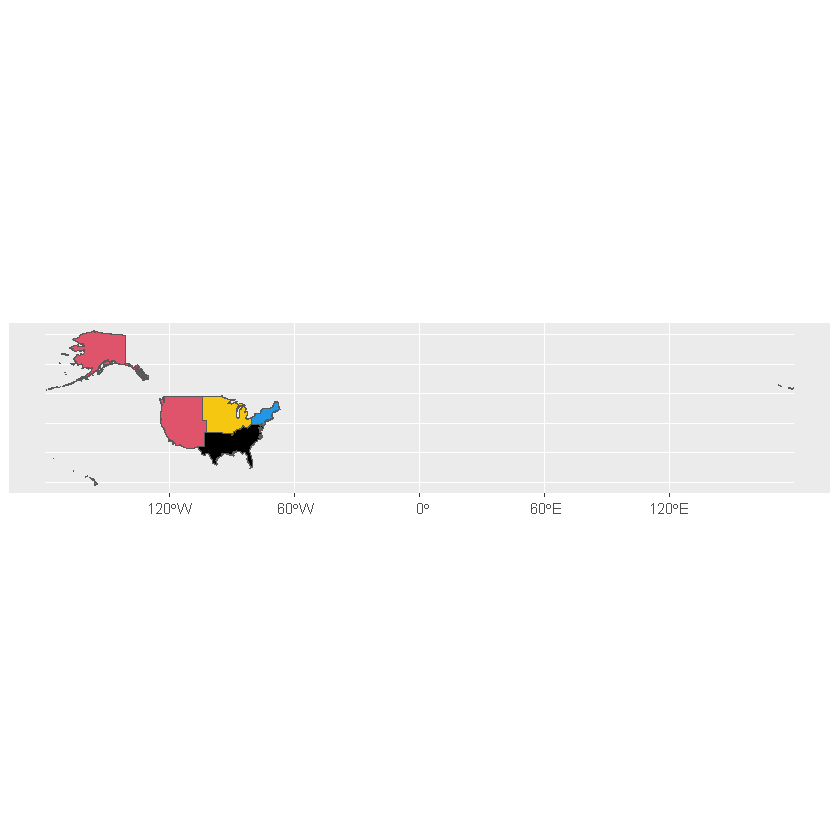

In [19]:
ggplot(merged_data) +
  geom_sf(fill=merged_data$regionsum)

**Cartesian Coordinates**  
Cartesian coordinates are coordinates that measure the position of a point from a defined origin along axes
that are perpendicular in the represented two-dimensional or three-dimensional space.

**Geodetic Coordinates (Geographic Coordinates)**  
Geodetic coordinates (sometimes called geographic coordinates) are angular coordinates (longitude and latitude),
closely related to spherical polar coordinates, and are defined relative to a particular Earth geodetic datum.

In [24]:
install.packages('maps')

Installing package into 'C:/Users/ashok/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'maps' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ashok\AppData\Local\Temp\RtmpormsGW\downloaded_packages


In [26]:
library('maps')
world1 <- sf::st_as_sf(map('world', plot = FALSE, fill = TRUE))
head(world1)


Attaching package: 'maps'


The following object is masked from 'package:purrr':

    map


ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called 'geojsonio'

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rp

,ID,geom
,<chr>,<MULTIPOLYGON [°]>
1,Aruba,MULTIPOLYGON (((-69.89912 1...
2,Afghanistan,MULTIPOLYGON (((74.89131 37...
3,Angola,MULTIPOLYGON (((23.9665 -10...
4,Anguilla,MULTIPOLYGON (((-63.00122 1...
5,Albania,MULTIPOLYGON (((20.06396 42...
6,Finland,MULTIPOLYGON (((20.61133 60...


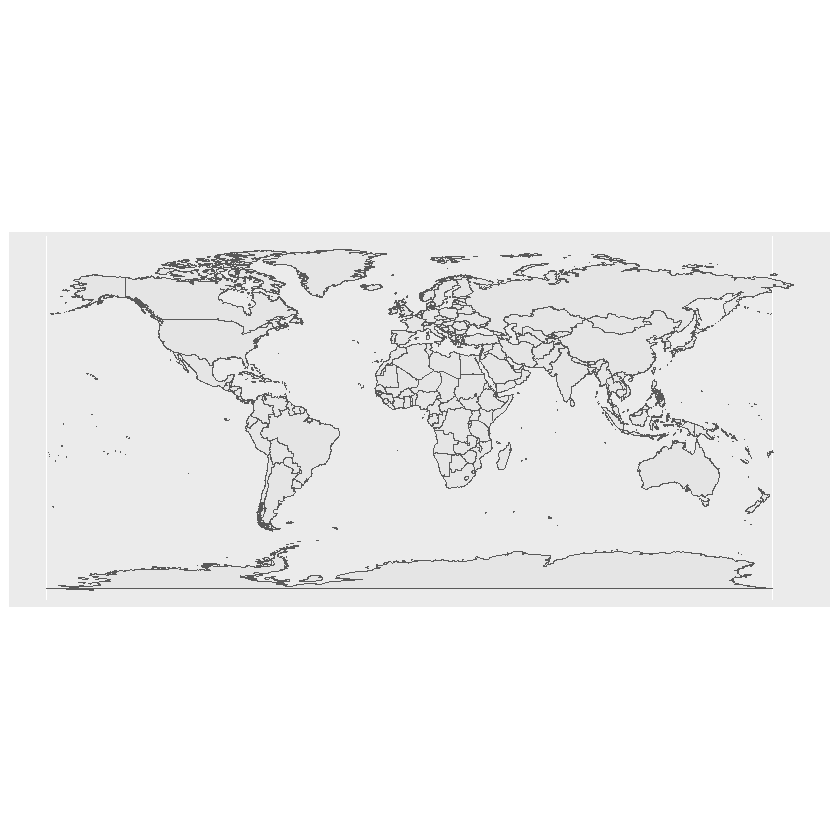

In [27]:
ggplot() + geom_sf(data = world1)

In [33]:
install.packages("ggmap")
library(ggmap)

Installing package into 'C:/Users/ashok/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'ggmap' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ashok\AppData\Local\Temp\RtmpormsGW\downloaded_packages


Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.

Please cite ggmap if you use it! See citation("ggmap") for details.



ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called 'geojsonio'

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_geojson.sf(obj)

,ID,geom
,<chr>,<MULTIPOLYGON [°]>
1,main,MULTIPOLYGON (((-101.4078 2...
2,martha's vineyard,MULTIPOLYGON (((-70.45089 4...
3,nantucket island,MULTIPOLYGON (((-70.06128 4...
4,manhattan,MULTIPOLYGON (((-73.92874 4...
5,staten island,MULTIPOLYGON (((-74.27824 4...
6,long island,MULTIPOLYGON (((-72.49635 4...


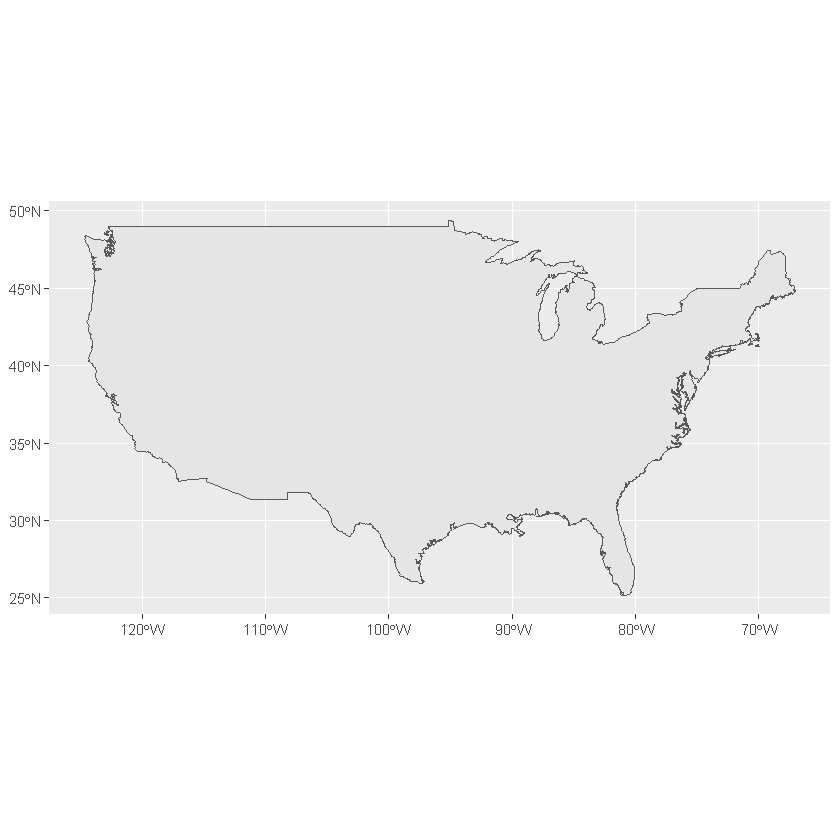

In [34]:
usa_map <- sf::st_as_sf(map('usa', plot = FALSE, fill = TRUE))
ggplot() + geom_sf(data = usa_map)
head(usa_map)


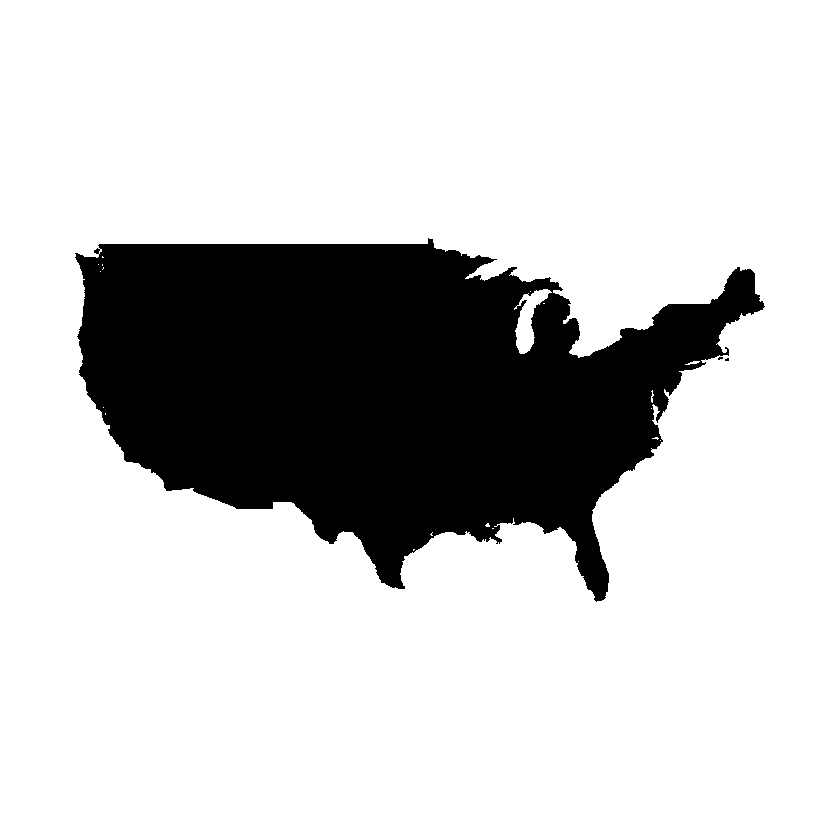

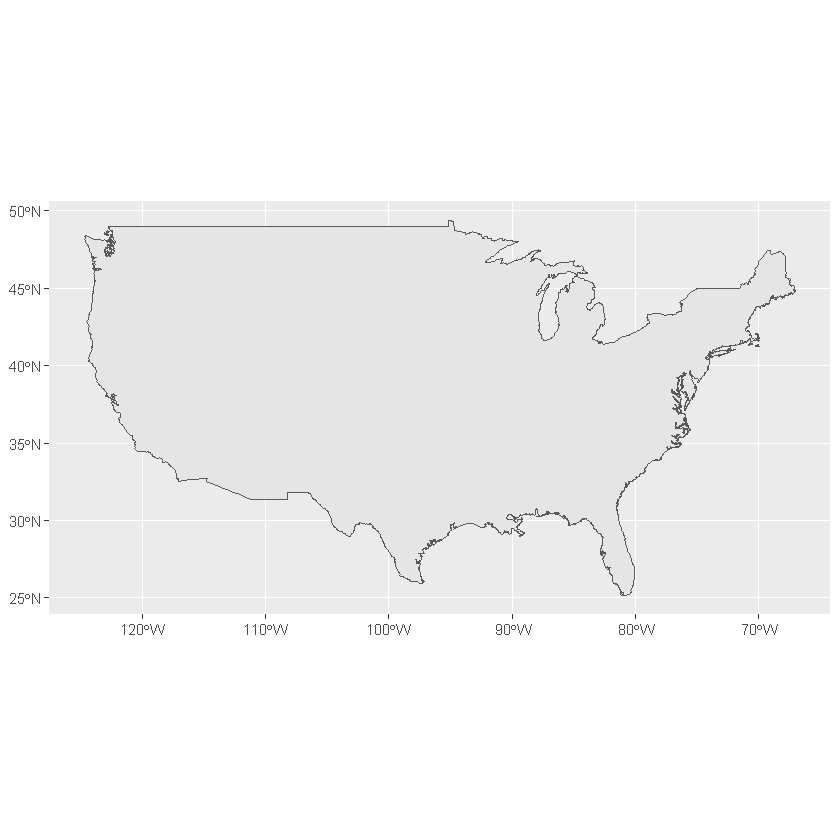

In [35]:

usa_map2 <- sf::st_as_sf(map('usa', plot = TRUE, fill = TRUE))
ggplot() + geom_sf(data = usa_map2)